In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv('airline_data.csv')  
df.head(5)

,iata_code,airline_name,region,functional_currency,ebit_usd,load_factor,low_cost_carrier,airline_age,num_routes,passenger_yield,ask,avg_fleet_age,fleet_size,aircraft_utilisation
0,ET,Ethiopian Airlines,Africa,ETB,1.032027e+09,0.703,N,78.0,136.0,0.107,6.449871e+10,8.80,154.0,NaN
1,KQ,Kenya Airways,Africa,KES,7.600000e+07,0.784,N,47.0,42.0,0.111,1.480400e+10,13.50,40.0,NaN
2,LA,LATAM Airlines,Latin America,USD,1.078165e+09,0.831,N,95.0,148.0,0.090,1.370000e+11,11.48,333.0,NaN
3,AV,Avianca,Latin America,USD,6.185440e+08,0.824,N,104.0,147.0,0.083,5.470600e+10,9.30,140.0,NaN
4,AD,Azul Brazilian Airlines,Latin America,BRL,5.968403e+08,0.804,Y,15.0,160.0,0.101,4.400600e+10,7.40,183.0,10.0


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   iata_code             100 non-null    object 
 1   airline_name          100 non-null    object 
 2   region                100 non-null    object 
 3   functional_currency   100 non-null    object 
 4   ebit_usd              70 non-null     float64
 5   load_factor           70 non-null     float64
 6   low_cost_carrier      100 non-null    object 
 7   airline_age           71 non-null     float64
 8   num_routes            54 non-null     float64
 9   passenger_yield       58 non-null     float64
 10  ask                   66 non-null     float64
 11  avg_fleet_age         64 non-null     float64
 12  fleet_size            72 non-null     float64
 13  aircraft_utilisation  21 non-null     float64
dtypes: float64(9), object(5)
memory usage: 11.1+ KB


In [300]:
df.isnull().sum()

iata_code                0
airline_name             0
region                   0
functional_currency      0
ebit_usd                30
load_factor             30
low_cost_carrier         0
airline_age             29
num_routes              46
passenger_yield         42
ask                     34
avg_fleet_age           36
fleet_size              28
aircraft_utilisation    79
dtype: int64

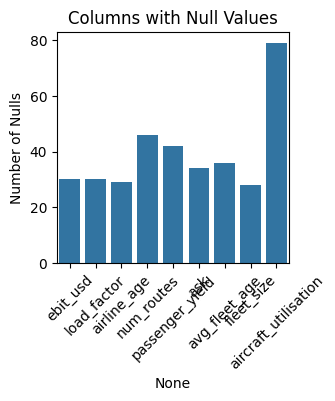

In [301]:
#Columns with null values before filling them
plt.figure(figsize=(3,3))
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0] 
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title("Columns with Null Values")
plt.ylabel("Number of Nulls")
plt.xticks(rotation=45)
plt.show()

In [302]:
# replacing NaN values with its mean
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
null_cols = df.isnull().sum()
null_cols = null_cols[null_cols > 0].index.tolist()
df[null_cols]=si.fit_transform(df[null_cols])

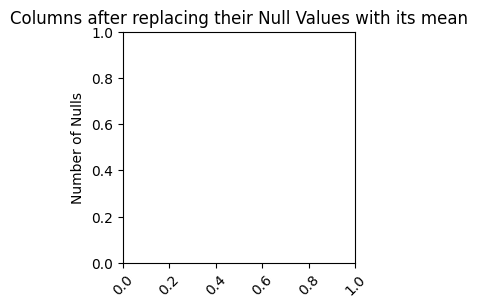

In [303]:
#Columns with null values after filling them
plt.figure(figsize=(3,3))
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0] 
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title("Columns after replacing their Null Values with its mean")
plt.ylabel("Number of Nulls")
plt.xticks(rotation=45)
plt.show()

In [304]:
#encoding categorical data
#label encoding for functional currencies
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['functional_currency_encoded'] = le.fit_transform(df['functional_currency'])
df['region_encoded'] = le.fit_transform(df['region'])

#label encoding for low_cost_carrier using map method
low_cost_dict = {'N': 0, 'Y': 1}
df['low_cost_carrier_encoded'] = df['low_cost_carrier'].map(low_cost_dict)


In [305]:
df.head()

,iata_code,airline_name,region,functional_currency,ebit_usd,load_factor,low_cost_carrier,airline_age,num_routes,passenger_yield,ask,avg_fleet_age,fleet_size,aircraft_utilisation,functional_currency_encoded,region_encoded,low_cost_carrier_encoded
0,ET,Ethiopian Airlines,Africa,ETB,1.032027e+09,0.703,N,78.0,136.0,0.107,6.449871e+10,8.80,154.0,10.060476,9,0,0
1,KQ,Kenya Airways,Africa,KES,7.600000e+07,0.784,N,47.0,42.0,0.111,1.480400e+10,13.50,40.0,10.060476,17,0,0
2,LA,LATAM Airlines,Latin America,USD,1.078165e+09,0.831,N,95.0,148.0,0.090,1.370000e+11,11.48,333.0,10.060476,38,3,0
3,AV,Avianca,Latin America,USD,6.185440e+08,0.824,N,104.0,147.0,0.083,5.470600e+10,9.30,140.0,10.060476,38,3,0
4,AD,Azul Brazilian Airlines,Latin America,BRL,5.968403e+08,0.804,Y,15.0,160.0,0.101,4.400600e+10,7.40,183.0,10.000000,5,3,1


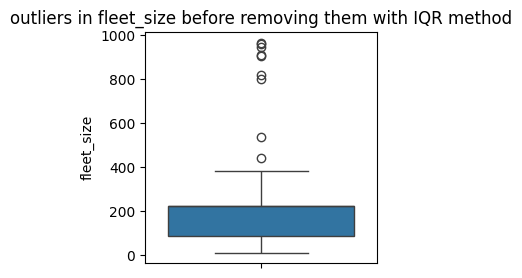

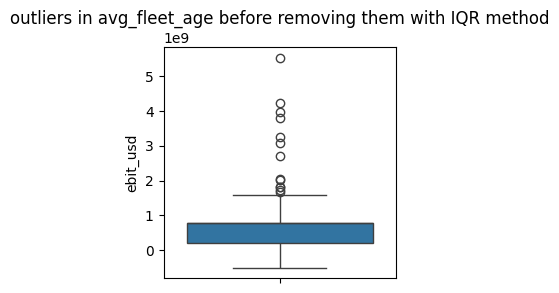

In [306]:
#checking for outliers
plt.figure(figsize=(3,3))
plt.title("outliers in fleet_size before removing them with IQR method")
sns.boxplot(df['fleet_size'])

plt.figure(figsize=(3,3))
sns.boxplot(df['ebit_usd'])
plt.title("outliers in avg_fleet_age before removing them with IQR method")
plt.show()

In [307]:
#removing outliers in fleet_size using IQR method
q1 = df['fleet_size'].quantile(0.25)
q3 = df['fleet_size'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
df = df[(df['fleet_size'] <= max_range) & (df['fleet_size'] >= min_range)]

#removing outliers in ebit_usd using IQR method
q1 = df['ebit_usd'].quantile(0.25)
q3 = df['ebit_usd'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
df = df[(df['ebit_usd'] <= max_range) & (df['ebit_usd'] >= min_range)]


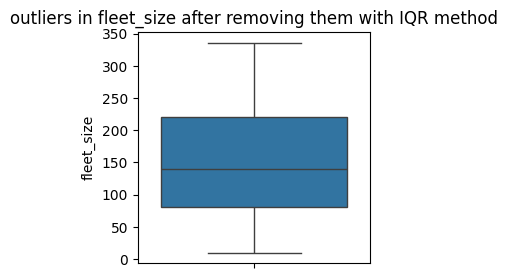

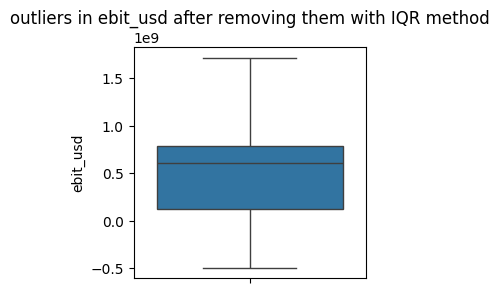

In [308]:
#after removing outliers
plt.figure(figsize=(3,3))
plt.title("outliers in fleet_size after removing them with IQR method")
sns.boxplot(df['fleet_size'])
plt.show()

plt.figure(figsize=(3,3))
sns.boxplot(df['ebit_usd'])
plt.title("outliers in ebit_usd after removing them with IQR method")
plt.show()

In [309]:
df['num_routes'].describe()

count      84.000000
mean      231.706349
std       158.903031
min        25.000000
25%       144.250000
50%       254.555556
75%       254.555556
max      1057.000000
Name: num_routes, dtype: float64

In [310]:
#feature scaling of num_routes using standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df[['num_routes']])
df['num_routes_fs'] = ss.transform(df[['num_routes']])

df['num_routes_fs'].describe()


count    8.400000e+01
mean    -3.033288e-16
std      1.006006e+00
min     -1.308646e+00
25%     -5.536812e-01
50%      1.446570e-01
75%      1.446570e-01
max      5.224887e+00
Name: num_routes_fs, dtype: float64

In [311]:
df['load_factor'].describe()

count    84.000000
mean      0.813493
std       0.045234
min       0.628000
25%       0.812250
50%       0.814914
75%       0.837750
max       0.905000
Name: load_factor, dtype: float64

In [312]:
#feature scaling of load_factor using min-max scaling or normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df[['load_factor']])
df['load_factor_fs'] = ms.transform(df[['load_factor']])
df['load_factor_fs'].describe()

count    84.000000
mean      0.669651
std       0.163299
min       0.000000
25%       0.665162
50%       0.674781
75%       0.757220
max       1.000000
Name: load_factor_fs, dtype: float64

In [313]:
#changing int into float datatype
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
df[int_cols] = df[int_cols].astype('float64')

In [314]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iata_code                    84 non-null     object 
 1   airline_name                 84 non-null     object 
 2   region                       84 non-null     object 
 3   functional_currency          84 non-null     object 
 4   ebit_usd                     84 non-null     float64
 5   load_factor                  84 non-null     float64
 6   low_cost_carrier             84 non-null     object 
 7   airline_age                  84 non-null     float64
 8   num_routes                   84 non-null     float64
 9   passenger_yield              84 non-null     float64
 10  ask                          84 non-null     float64
 11  avg_fleet_age                84 non-null     float64
 12  fleet_size                   84 non-null     float64
 13  aircraft_utilisation       

In [315]:
import sqlite3

In [316]:
conn = sqlite3.connect(':memory:') 
df.to_sql('airlines', conn, index=False, if_exists='replace')


84

In [317]:
#sql query to get top airlines name and fleet size
query = '''
SELECT airline_name, fleet_size
FROM airlines
ORDER BY fleet_size DESC
LIMIT 5;
'''

result_df = pd.read_sql_query(query, conn)
print(result_df)


      airline_name  fleet_size
0          EasyJet       336.0
1   LATAM Airlines       333.0
2  Alaska Airlines       314.0
3          JetBlue       300.0
4           IndiGo       300.0


          region    avg_age
0    Middle East   8.580885
1   Asia Pacific   9.345481
2  Latin America   9.827552
3  North America  10.472062
4         Europe  10.556191
5         Africa  11.150000


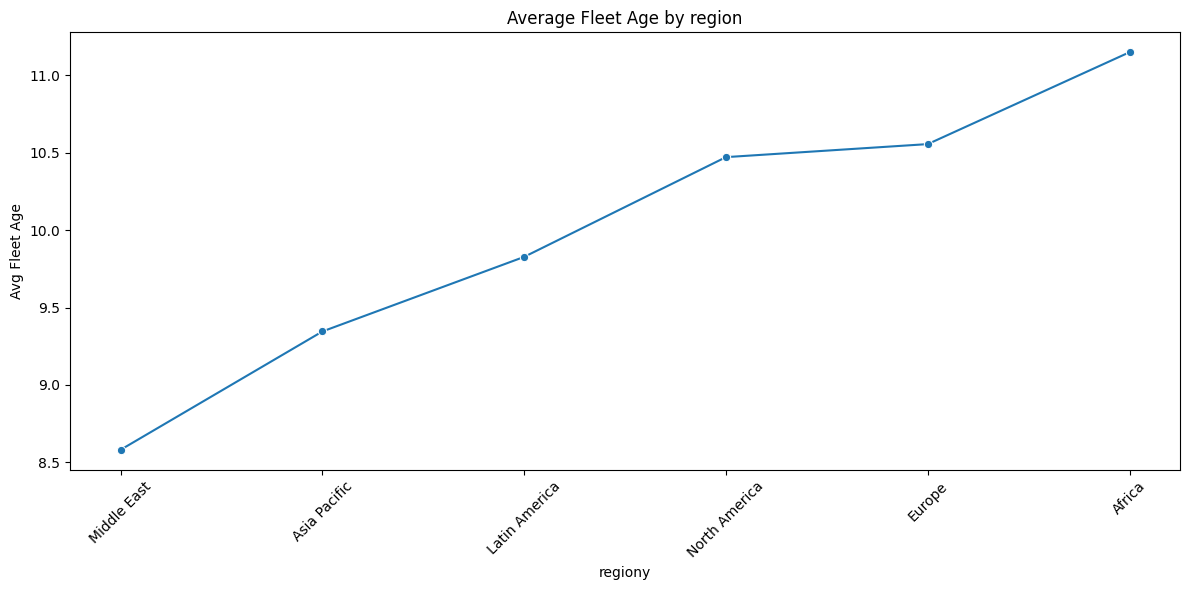

In [318]:
#sql query to get average fleet age by region and to visulaize it
query = '''
SELECT region, AVG(avg_fleet_age) AS avg_age
FROM airlines
GROUP BY region
ORDER BY avg_age ASC;
'''

result_df = pd.read_sql_query(query, conn)
print(result_df)

plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='region', y='avg_age', marker='o')
plt.xticks(rotation=45)
plt.title("Average Fleet Age by region")
plt.xlabel("regiony")
plt.ylabel("Avg Fleet Age")
plt.tight_layout()
plt.show()



In [319]:
#sql query to get fleet distribution stats
query = '''
SELECT 
    MIN(fleet_size) AS min_fleet,
    MAX(fleet_size) AS max_fleet,
    AVG(fleet_size) AS avg_fleet
FROM airlines;
'''
result_df = pd.read_sql_query(query, conn)
print(result_df)


   min_fleet  max_fleet   avg_fleet
0       10.0      336.0  151.217593


In [320]:
#sql query to get missing values in ask {gives empty because I've optimised the dataset :) }
query = '''
SELECT *
FROM airlines
WHERE ask IS NULL;
'''

result_df = pd.read_sql_query(query, conn)
print(result_df)

Empty DataFrame
Columns: [iata_code, airline_name, region, functional_currency, ebit_usd, load_factor, low_cost_carrier, airline_age, num_routes, passenger_yield, ask, avg_fleet_age, fleet_size, aircraft_utilisation, functional_currency_encoded, region_encoded, low_cost_carrier_encoded, num_routes_fs, load_factor_fs]
Index: []


In [321]:
df.to_csv('cleaned_airline_data.csv', index=False)
